In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_column',None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-application-and-transaction-fraud-detection/loan_applications.csv
/kaggle/input/loan-application-and-transaction-fraud-detection/transactions.csv


In [2]:
## Lets Look at the data povided
loan_ap=pd.read_csv('/kaggle/input/loan-application-and-transaction-fraud-detection/loan_applications.csv')
loan_ap.head()

,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,residential_address,applicant_age,gender,number_of_dependents,loan_status,fraud_flag,fraud_type
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,714,1100.0,3.17,Rented,"94/31, Sehgal Zila, Vadodara-380521, Anantapur...",28,Female,3,Approved,0,NaN
1,91224cec-3544-4bc7-ac15-a9792da54c02,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,667,0.0,0.00,Owned,"H.No. 00, Sheth Chowk, Ichalkaranji 006728, Im...",44,Other,3,Approved,0,NaN
2,4efcd02d-4a03-4ab7-9bd1-0ff430493d0c,CUST100674,2023-05-22,Education Loan,431000.0,60,11.40,Medical Emergency,Self-Employed,14800.0,808,4600.0,31.08,Rented,"H.No. 81, Dutta Path, Kozhikode-340301, Tadepa...",56,Other,4,Approved,0,NaN
3,a61337d4-ba04-4a68-b492-2cb8266e6ed7,CUST106466,2024-07-09,Car Loan,324000.0,120,10.36,Debt Consolidation,Self-Employed,28800.0,647,4000.0,13.89,Rented,"H.No. 022, Rege Road, Tiruvottiyur-927857, Aur...",27,Other,4,Declined,0,NaN
4,a8d1639e-170b-41b2-826a-55c7dae38d16,CUST112319,2023-11-20,Personal Loan,100000.0,36,14.14,Business Expansion,Salaried,43900.0,624,1100.0,2.51,Rented,"85/24, Bali Zila, Sambalpur 922071, Tumkur, Ke...",50,Other,0,Declined,0,NaN


In [3]:
transaction=pd.read_csv('/kaggle/input/loan-application-and-transaction-fraud-detection/transactions.csv')

In [4]:
transaction.head()

,transaction_id,customer_id,transaction_date,transaction_type,transaction_amount,merchant_category,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,device_used,ip_address,transaction_status,transaction_source_destination,transaction_notes,fraud_flag
0,2d7ddfd4-1112-4354-a2dd-fad94b45a850,CUST102188,2022-01-04 11:27:00,Bill Payment,2100.0,Dining,"Rattan, Khanna and Magar","Srikakulam, Himachal Pradesh",8211.0,0,Web,31.102.21.141,Success,BCHG80012468703731,Payment for Dining,0
1,ba998721-a612-4e0a-8354-46d001e9c39c,CUST107144,2022-01-03 23:52:00,UPI,1400.0,Travel,Chauhan LLC,"Giridih, Manipur",12858.0,0,Web,176.48.222.166,Success,CJPZ11841095072972,Payment for Travel,0
2,0b4ad8e2-40ac-49c9-b59a-c9efaaccc7a6,CUST102126,2022-01-15 06:54:00,Debit Card,1000.0,Entertainment,Halder-Sarma,"Avadi, Kerala",19268.0,0,ATM,181.62.105.161,Success,TLCG50761416960179,Payment for Entertainment,0
3,c4fce988-34c5-48db-8686-bfad0b3bc0b5,CUST109887,2022-01-08 07:57:00,Credit Card,10500.0,Utilities,"Anand, Khare and Balakrishnan","Navi Mumbai, Maharashtra",29585.0,0,ATM,121.157.246.80,Success,PRZJ55096553432036,Payment for Utilities,0
4,f9b8ca30-00e5-4322-8cff-eac0554cf2da,CUST108620,2022-01-02 10:43:00,Loan Disbursement,8100.0,Electronics,Zacharia and Sons,"Visakhapatnam, Gujarat",0.0,0,ATM,129.96.5.57,Success,NBAI29021393288369,Payment for Electronics,0


In [5]:
## Description of the given data is important for better understanding and feature engineering

loan_ap.describe()

,loan_amount_requested,loan_tenure_months,interest_rate_offered,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,applicant_age,number_of_dependents,fraud_flag
count,5.000000e+04,50000.0000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.139130e+05,121.3884,10.528547,50844.940000,699.149760,3066.3620,8.573188,43.060880,2.012280,0.020520
std,2.752126e+05,121.4104,1.926442,23874.742237,49.920325,1896.9745,9.587649,12.970254,1.408761,0.141772
min,1.000000e+05,12.0000,7.000000,10000.000000,476.000000,0.0000,0.000000,21.000000,0.000000,0.000000
25%,3.000000e+05,24.0000,9.150000,33600.000000,665.000000,1700.0000,3.090000,32.000000,1.000000,0.000000
50%,5.030000e+05,60.0000,10.510000,50300.000000,699.000000,3000.0000,5.950000,43.000000,2.000000,0.000000
75%,7.010000e+05,240.0000,11.850000,67300.000000,733.000000,4400.0000,10.292500,54.000000,3.000000,0.000000
max,1.618000e+06,360.0000,19.620000,162000.000000,888.000000,11400.0000,102.000000,65.000000,4.000000,1.000000


In [6]:
loan_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   application_id             50000 non-null  object 
 1   customer_id                50000 non-null  object 
 2   application_date           50000 non-null  object 
 3   loan_type                  50000 non-null  object 
 4   loan_amount_requested      50000 non-null  float64
 5   loan_tenure_months         50000 non-null  int64  
 6   interest_rate_offered      50000 non-null  float64
 7   purpose_of_loan            50000 non-null  object 
 8   employment_status          50000 non-null  object 
 9   monthly_income             50000 non-null  float64
 10  cibil_score                50000 non-null  int64  
 11  existing_emis_monthly      50000 non-null  float64
 12  debt_to_income_ratio       50000 non-null  float64
 13  property_ownership_status  50000 non-null  obj

In [7]:
transaction.describe()

,transaction_amount,account_balance_after_transaction,is_international_transaction,fraud_flag
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,5005.674329,21930.235669,0.010440,0.010040
std,5070.810305,14621.954095,0.101643,0.099697
min,100.000000,0.000000,0.000000,0.000000
25%,1400.000000,9237.000000,0.000000,0.000000
50%,3461.505910,21586.500000,0.000000,0.000000
75%,6900.000000,33994.250000,0.000000,0.000000
max,76531.610223,89097.000000,1.000000,1.000000


In [8]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   transaction_id                     50000 non-null  object 
 1   customer_id                        50000 non-null  object 
 2   transaction_date                   50000 non-null  object 
 3   transaction_type                   50000 non-null  object 
 4   transaction_amount                 50000 non-null  float64
 5   merchant_category                  50000 non-null  object 
 6   merchant_name                      50000 non-null  object 
 7   transaction_location               50000 non-null  object 
 8   account_balance_after_transaction  50000 non-null  float64
 9   is_international_transaction       50000 non-null  int64  
 10  device_used                        50000 non-null  object 
 11  ip_address                         50000 non-null  obj

In [9]:
#Checking for the null values and dealing with it
loan_ap.isnull().sum()

application_id                   0
customer_id                      0
application_date                 0
loan_type                        0
loan_amount_requested            0
loan_tenure_months               0
interest_rate_offered            0
purpose_of_loan                  0
employment_status                0
monthly_income                   0
cibil_score                      0
existing_emis_monthly            0
debt_to_income_ratio             0
property_ownership_status        0
residential_address              0
applicant_age                    0
gender                           0
number_of_dependents             0
loan_status                      0
fraud_flag                       0
fraud_type                   48974
dtype: int64

In [10]:
loan_ap=loan_ap.drop(['fraud_type'],axis=1)

In [11]:
transaction.isnull().sum()

transaction_id                       0
customer_id                          0
transaction_date                     0
transaction_type                     0
transaction_amount                   0
merchant_category                    0
merchant_name                        0
transaction_location                 0
account_balance_after_transaction    0
is_international_transaction         0
device_used                          0
ip_address                           0
transaction_status                   0
transaction_source_destination       0
transaction_notes                    0
fraud_flag                           0
dtype: int64

In [12]:
#dropping not so important columns
loan_ap=loan_ap.drop(['application_id','residential_address'],axis=1)

In [13]:
loan_ap.head()

,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,applicant_age,gender,number_of_dependents,loan_status,fraud_flag
0,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,714,1100.0,3.17,Rented,28,Female,3,Approved,0
1,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,667,0.0,0.00,Owned,44,Other,3,Approved,0
2,CUST100674,2023-05-22,Education Loan,431000.0,60,11.40,Medical Emergency,Self-Employed,14800.0,808,4600.0,31.08,Rented,56,Other,4,Approved,0
3,CUST106466,2024-07-09,Car Loan,324000.0,120,10.36,Debt Consolidation,Self-Employed,28800.0,647,4000.0,13.89,Rented,27,Other,4,Declined,0
4,CUST112319,2023-11-20,Personal Loan,100000.0,36,14.14,Business Expansion,Salaried,43900.0,624,1100.0,2.51,Rented,50,Other,0,Declined,0


In [14]:
# Importing some important libraries for feature engineering and model training
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

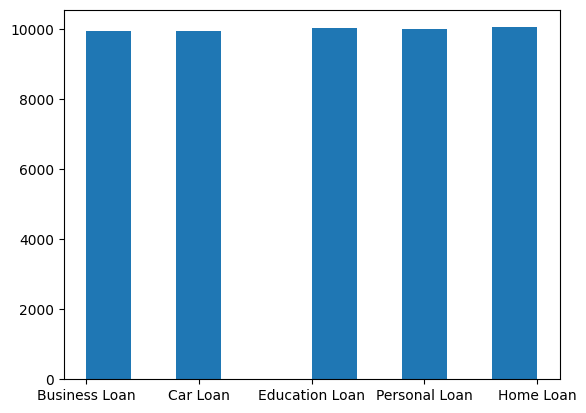

In [15]:
#Lets visualize the loan application data for better understanding
plt.hist(loan_ap['loan_type'])
plt.show()

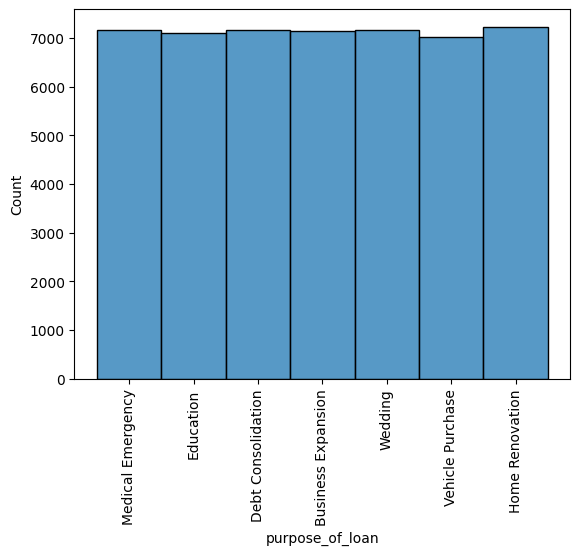

In [16]:
sns.histplot(loan_ap['purpose_of_loan'])
plt.xticks(rotation=90)
plt.show()

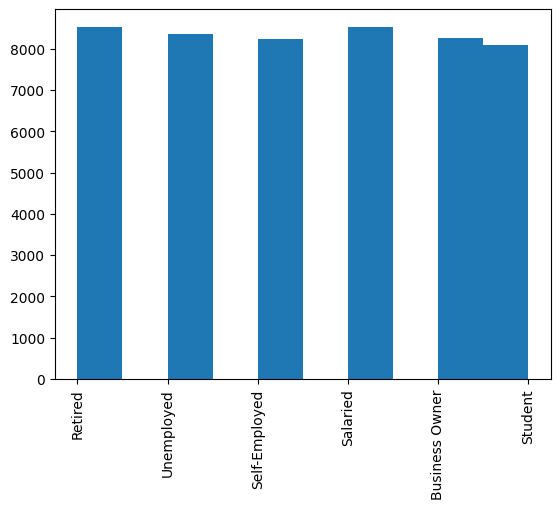

In [17]:
plt.hist(loan_ap['employment_status'])
plt.xticks(rotation=90)
plt.show()

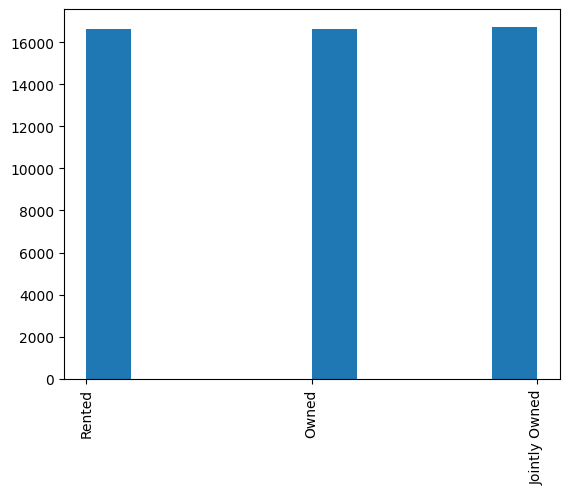

In [18]:
plt.hist(loan_ap['property_ownership_status'])
plt.xticks(rotation=90)
plt.show()

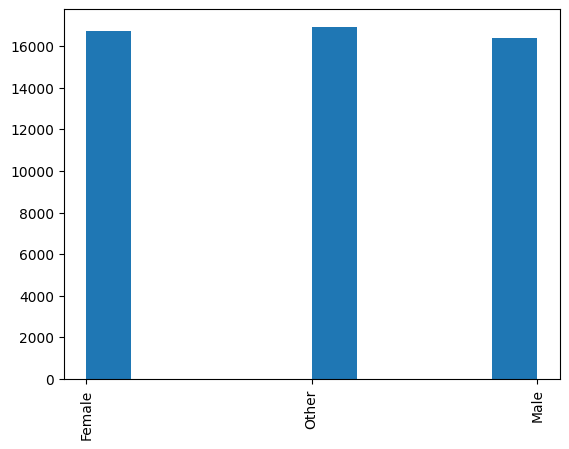

In [19]:
plt.hist(loan_ap['gender'])
plt.xticks(rotation=90)
plt.show()

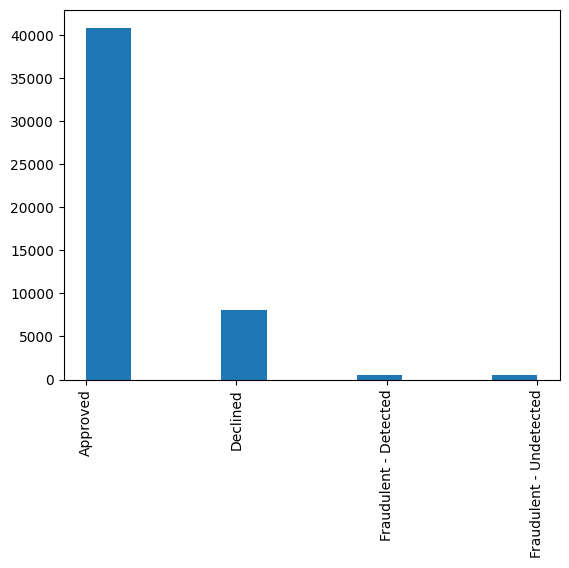

In [20]:
plt.hist(loan_ap['loan_status'])
plt.xticks(rotation=90)
plt.show()

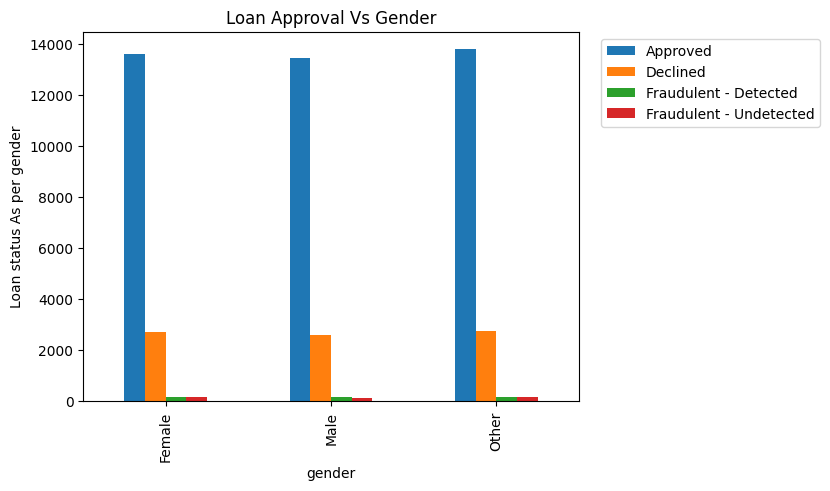

In [21]:
# Data Visualization for multiple related columns
#sns.histplot(loan_ap['gender'],hue=loan_ap['loan_status'])
loan_ap.groupby('gender')['loan_status'].value_counts().unstack().plot.bar(ylabel='Loan status As per gender')
plt.legend(bbox_to_anchor=[1.5,1.0],loc='upper right')
plt.title('Loan Approval Vs Gender')
plt.show()

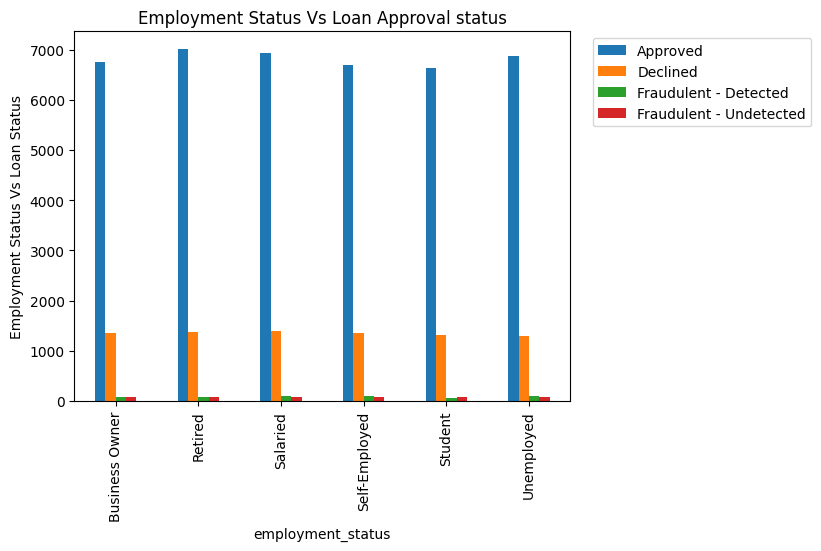

In [22]:
loan_ap.groupby('employment_status')['loan_status'].value_counts().unstack().plot.bar(ylabel='Employment Status Vs Loan Status')
plt.legend(bbox_to_anchor=[1.5,1.0],loc='upper right')
plt.title('Employment Status Vs Loan Approval status')
plt.show()

In [23]:
loan_ap.head()

,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,applicant_age,gender,number_of_dependents,loan_status,fraud_flag
0,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,714,1100.0,3.17,Rented,28,Female,3,Approved,0
1,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,667,0.0,0.00,Owned,44,Other,3,Approved,0
2,CUST100674,2023-05-22,Education Loan,431000.0,60,11.40,Medical Emergency,Self-Employed,14800.0,808,4600.0,31.08,Rented,56,Other,4,Approved,0
3,CUST106466,2024-07-09,Car Loan,324000.0,120,10.36,Debt Consolidation,Self-Employed,28800.0,647,4000.0,13.89,Rented,27,Other,4,Declined,0
4,CUST112319,2023-11-20,Personal Loan,100000.0,36,14.14,Business Expansion,Salaried,43900.0,624,1100.0,2.51,Rented,50,Other,0,Declined,0


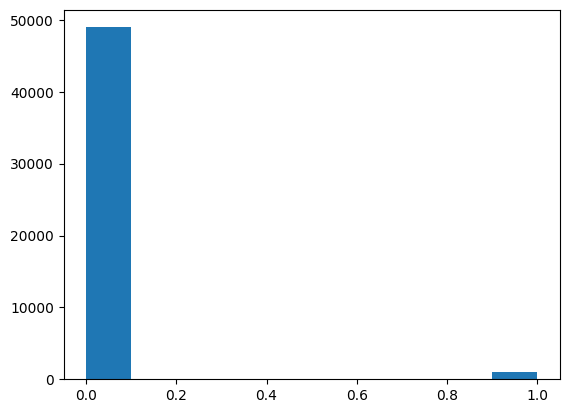

In [24]:
plt.hist(loan_ap['fraud_flag'])
plt.show()

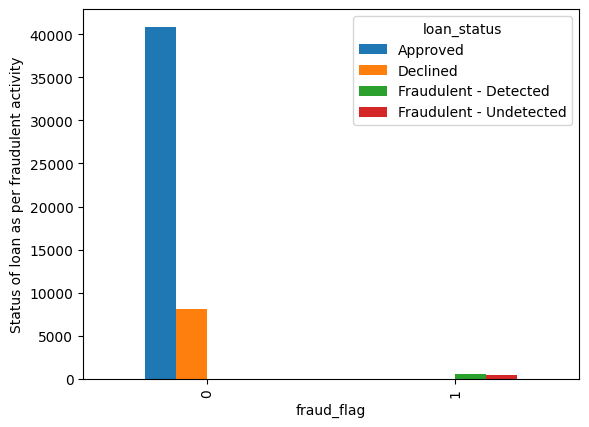

In [25]:
loan_ap.groupby('fraud_flag')['loan_status'].value_counts().unstack().plot.bar(ylabel='Status of loan as per fraudulent activity')
plt.show()

In [26]:
loan_ap=loan_ap.drop(['customer_id','application_date'],axis=1)

In [27]:
loan_ap.head(2)

,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,applicant_age,gender,number_of_dependents,loan_status,fraud_flag
0,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,714,1100.0,3.17,Rented,28,Female,3,Approved,0
1,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,667,0.0,0.00,Owned,44,Other,3,Approved,0


In [28]:
# Seperating CAtegorical and Numerical Data
catogorical=loan_ap.select_dtypes(include='object')


In [29]:
catogorical.head()

,loan_type,purpose_of_loan,employment_status,property_ownership_status,gender,loan_status
0,Business Loan,Medical Emergency,Retired,Rented,Female,Approved
1,Car Loan,Education,Unemployed,Owned,Other,Approved
2,Education Loan,Medical Emergency,Self-Employed,Rented,Other,Approved
3,Car Loan,Debt Consolidation,Self-Employed,Rented,Other,Declined
4,Personal Loan,Business Expansion,Salaried,Rented,Other,Declined


In [30]:
# Converting catogorical into Numerical
for col in catogorical.columns:
    le=LabelEncoder()
    catogorical[col]=le.fit_transform(catogorical[col])

In [31]:
catogorical.head()

,loan_type,purpose_of_loan,employment_status,property_ownership_status,gender,loan_status
0,0,4,1,2,0,0
1,1,2,5,1,2,0
2,2,4,3,2,2,0
3,1,1,3,2,2,1
4,4,0,2,2,2,1


In [32]:
loan_ap=loan_ap.drop(['loan_type','purpose_of_loan','employment_status','property_ownership_status','gender','loan_status'],axis=1)

In [33]:
data=pd.concat([loan_ap,catogorical],axis=1,join='inner')

In [34]:
data.head()

,loan_amount_requested,loan_tenure_months,interest_rate_offered,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,applicant_age,number_of_dependents,fraud_flag,loan_type,purpose_of_loan,employment_status,property_ownership_status,gender,loan_status
0,604000.0,12,11.66,34700.0,714,1100.0,3.17,28,3,0,0,4,1,2,0,0
1,100000.0,240,13.62,51600.0,667,0.0,0.00,44,3,0,1,2,5,1,2,0
2,431000.0,60,11.40,14800.0,808,4600.0,31.08,56,4,0,2,4,3,2,2,0
3,324000.0,120,10.36,28800.0,647,4000.0,13.89,27,4,0,1,1,3,2,2,1
4,100000.0,36,14.14,43900.0,624,1100.0,2.51,50,0,0,4,0,2,2,2,1


In [35]:
#Checking correlation of column 
corr=data.corr()

In [36]:
corr

,loan_amount_requested,loan_tenure_months,interest_rate_offered,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,applicant_age,number_of_dependents,fraud_flag,loan_type,purpose_of_loan,employment_status,property_ownership_status,gender,loan_status
loan_amount_requested,1.000000,0.006663,-0.007302,-0.006286,0.008059,0.005053,0.004797,-0.006977,0.002295,-0.005917,0.000439,0.002597,0.000597,0.005850,0.003185,-0.007275
loan_tenure_months,0.006663,1.000000,0.003541,0.001452,-0.003773,-0.006499,-0.004638,-0.003327,0.004576,-0.000484,0.007153,-0.002059,-0.000425,0.010293,-0.006655,-0.002241
interest_rate_offered,-0.007302,0.003541,1.000000,-0.002480,0.005230,-0.002010,-0.002086,-0.004983,0.005007,-0.001440,-0.004243,0.001494,-0.009883,0.002110,-0.000602,-0.001422
monthly_income,-0.006286,0.001452,-0.002480,1.000000,0.001978,-0.002386,-0.564735,0.018267,-0.009575,-0.001949,-0.002878,-0.004168,-0.000240,-0.005243,-0.001081,0.001544
cibil_score,0.008059,-0.003773,0.005230,0.001978,1.000000,0.004748,0.006166,0.001565,-0.004552,0.001095,0.007537,0.000628,0.003675,-0.001760,0.001184,-0.489881
existing_emis_monthly,0.005053,-0.006499,-0.002010,-0.002386,0.004748,1.000000,0.550665,-0.004402,-0.001044,-0.000631,0.002441,-0.002453,0.003186,-0.003595,0.003487,-0.007018
debt_to_income_ratio,0.004797,-0.004638,-0.002086,-0.564735,0.006166,0.550665,1.000000,-0.020872,0.005563,0.005644,0.002781,-0.000300,0.007860,0.004664,0.004233,-0.001129
applicant_age,-0.006977,-0.003327,-0.004983,0.018267,0.001565,-0.004402,-0.020872,1.000000,0.001336,0.004846,-0.001886,0.000150,0.005849,0.006218,0.009446,0.002106
number_of_dependents,0.002295,0.004576,0.005007,-0.009575,-0.004552,-0.001044,0.005563,0.001336,1.000000,-0.004166,-0.001917,-0.000774,0.001194,0.005838,-0.018614,-0.001585
fraud_flag,-0.005917,-0.000484,-0.001440,-0.001949,0.001095,-0.000631,0.005644,0.004846,-0.004166,1.000000,-0.005367,-0.001888,0.005086,-0.006266,-0.005318,0.657765


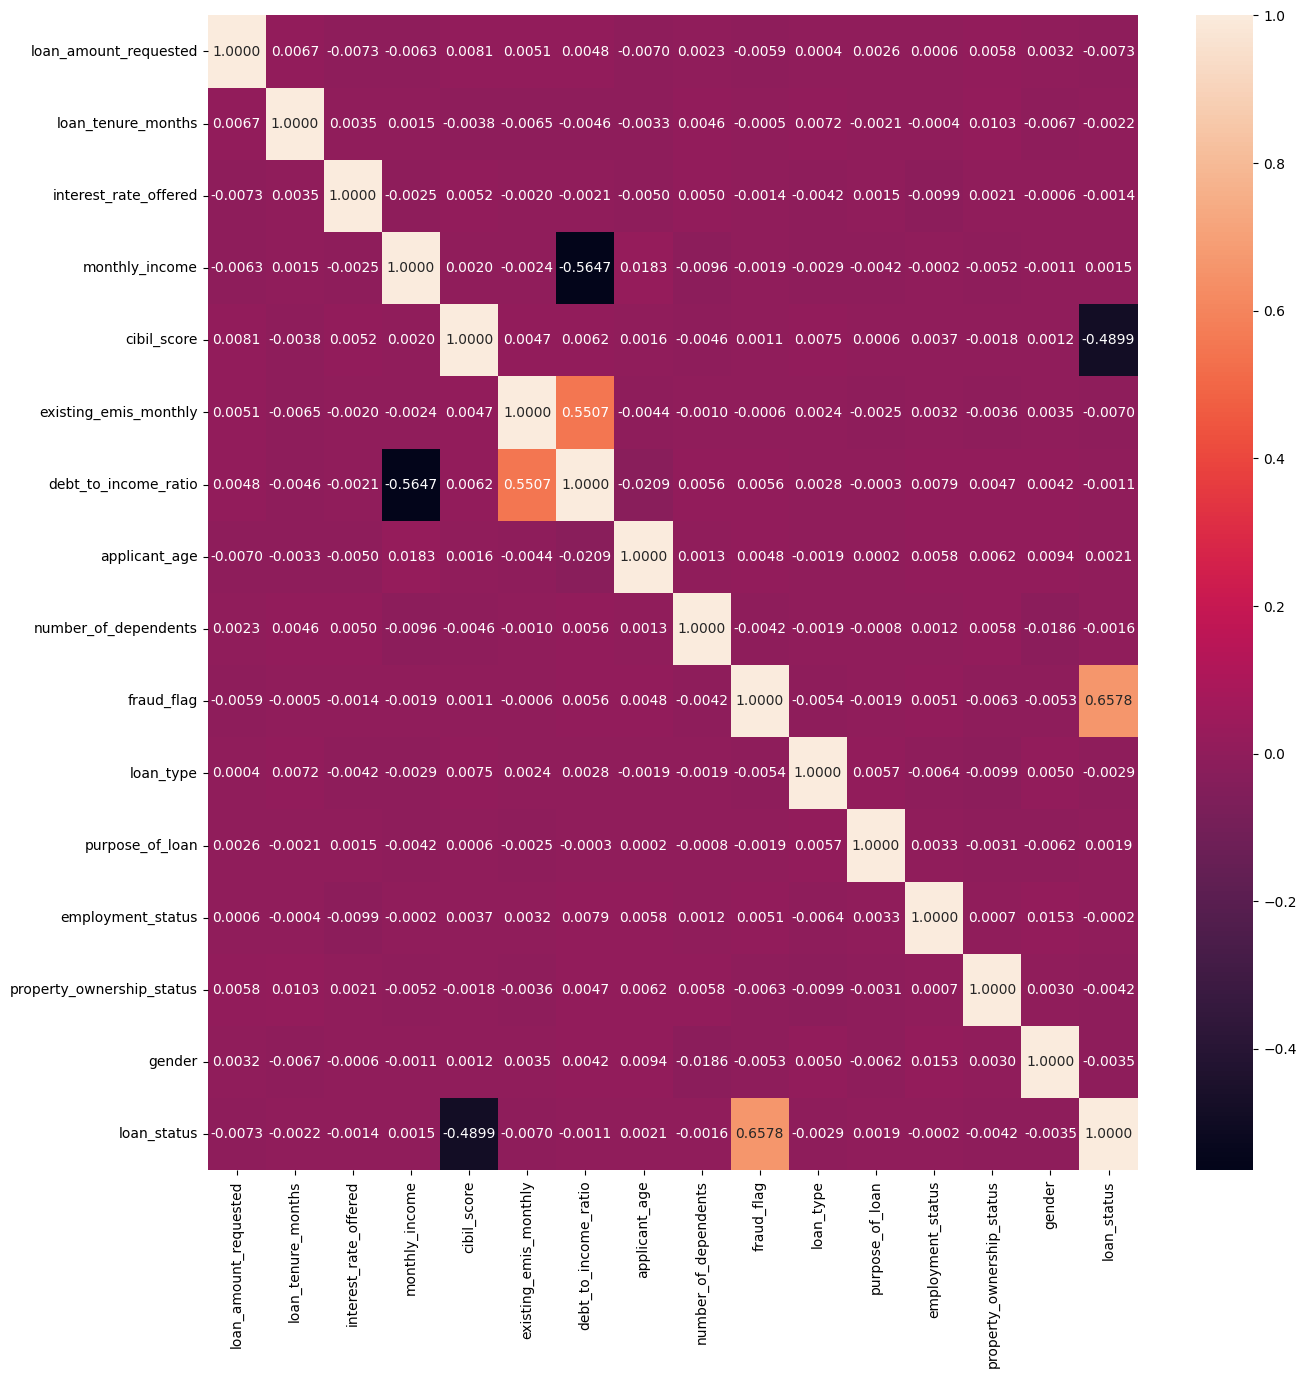

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,fmt='.4f')
plt.show()

In [38]:
# Seperating target variable
X=data.drop(['loan_status'],axis=1)
y=data['loan_status']

In [39]:
#Seperate train and test data for training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40000, 15), (10000, 15), (40000,), (10000,))

In [41]:
# Applying Classification models
LC=LogisticRegression()

In [42]:
LC.fit(X_train,y_train)

LogisticRegression()

In [43]:
LC_pred=LC.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy=accuracy_score(y_test,LC_pred)

In [46]:
print(f"Accuracy Score of Logistic Regression is:{accuracy:.2f}%")

Accuracy Score of Logistic Regression is:0.82%


In [47]:
# Decision Tree
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT_predict=DT.predict(X_test)
DT_acc=accuracy_score(y_test,DT_predict)
print(f"Accuracy Score of Decision Tree is:{DT_acc:.2f}%")

Accuracy Score of Decision Tree is:0.99%


In [48]:
#Random Forest
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
RF_predict=RF.predict(X_test)
RF_acc=accuracy_score(y_test,RF_predict)
print(f"Accuracy score of Random Forest is:{RF_acc:.2f}%")

Accuracy score of Random Forest is:0.99%


In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
#Confusion matrix of Logistic Regression
confusion_matrix(y_test,LC_pred)

array([[8154,    0,    0,    0],
       [1642,    0,    0,    0],
       [ 110,    0,    0,    0],
       [  94,    0,    0,    0]])

In [51]:
#Confusion matrix of Decision Tree
confusion_matrix(y_test,DT_predict)

array([[8154,    0,    0,    0],
       [   0, 1642,    0,    0],
       [   0,    0,   57,   53],
       [   0,    0,   49,   45]])

In [52]:
#Confusion Matrix of Random Forest
confusion_matrix(y_test,RF_predict)

array([[8154,    0,    0,    0],
       [   0, 1642,    0,    0],
       [   0,    0,   61,   49],
       [   0,    0,   57,   37]])